In [163]:
import pandas as pd
import numpy as np
import itertools, matplotlib

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from clustering_functions import wcss_and_silhouette, silhouette_graph, run_TMCQ_graph

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [15]:
data = pd.read_csv('data/Christie_diagnosis_20180118.csv')
#data_small = data.sample(n=200)
X_TMCQ = data[['Y1_P_TMCQ_ACTIVITY', 
            'Y1_P_TMCQ_AFFIL',  
            'Y1_P_TMCQ_ANGER',  
            'Y1_P_TMCQ_FEAR',  
            'Y1_P_TMCQ_HIP',  
            'Y1_P_TMCQ_IMPULS',  
            'Y1_P_TMCQ_INHIBIT',  
            'Y1_P_TMCQ_SAD', 
            'Y1_P_TMCQ_SHY', 
            'Y1_P_TMCQ_SOOTHE',  
            'Y1_P_TMCQ_ASSERT', 
            'Y1_P_TMCQ_ATTFOCUS',  
            'Y1_P_TMCQ_LIP', 
            'Y1_P_TMCQ_PERCEPT', 
            'Y1_P_TMCQ_DISCOMF', 
            'Y1_P_TMCQ_OPENNESS']]

X_TMCQ_nonull = X_TMCQ[X_TMCQ.isnull().sum(axis=1) == 0]

In [16]:
X_TMCQ.shape

(901, 16)

The JAMA paper used these 16 scales:
```
'Y1_P_TMCQ_ACTIVITY', 
'Y1_P_TMCQ_AFFIL',  
'Y1_P_TMCQ_ANGER',  
'Y1_P_TMCQ_FEAR',  
'Y1_P_TMCQ_HIP',  
'Y1_P_TMCQ_IMPULS',  
'Y1_P_TMCQ_INHIBIT',  
'Y1_P_TMCQ_SAD', 
'Y1_P_TMCQ_SHY', 
'Y1_P_TMCQ_SOOTHE',  
'Y1_P_TMCQ_ASSERT', 
'Y1_P_TMCQ_ATTFOCUS',  
'Y1_P_TMCQ_LIP', 
'Y1_P_TMCQ_PERCEPT', 
'Y1_P_TMCQ_DISCOMF', 
'Y1_P_TMCQ_OPENNESS',
```
The following were omitted:
```
'Y1_P_TMCQ_ACTIVCONT',
'Y1_P_TMCQ_SURGENCY',
'Y1_P_TMCQ_EFFCONT', 
'Y1_P_TMCQ_NEGAFFECT'
```

In [54]:
effortful_control = ['Y1_P_TMCQ_IMPULS', 'Y1_P_TMCQ_INHIBIT', 'Y1_P_TMCQ_ATTFOCUS']
surgency = ['Y1_P_TMCQ_SHY', 'Y1_P_TMCQ_HIP', 'Y1_P_TMCQ_ACTIVITY', 'Y1_P_TMCQ_AFFIL', 'Y1_P_TMCQ_ASSERT']
negative_emotion = ['Y1_P_TMCQ_ANGER', 'Y1_P_TMCQ_DISCOMF', 'Y1_P_TMCQ_SOOTHE', 'Y1_P_TMCQ_FEAR', 'Y1_P_TMCQ_SAD']
weak_differentiation = ['Y1_P_TMCQ_OPENNESS', 'Y1_P_TMCQ_PERCEPT', 'Y1_P_TMCQ_LIP']

# Unsupervised Learning

[Subtyping ADHD Using Tempermant Dimensions](https://jamanetwork.com/journals/jamapsychiatry/fullarticle/1885709)

The above is a paper written by Dr. Karalunas that utilized community detection analysis on the Temperment in Middle Childhood Questionnaire (TMCQ).
They had 437 children and used the TMCQ from year 1. 
They specifically used the [Fast Greedy algorithm](https://arxiv.org/abs/cond-mat/0408187) and found 3 profiles of children, which they labeled as "mild", "surgent", and "irritable".

I tried different clustering algorithms to see if the same profiles seem to exist.
I also attempted to replicate this analysis on the full 901 dataset using community detection. ([community detection in python](https://yoyoinwanderland.github.io/2017/08/08/Community-Detection-in-Python/)).

They used physiological and MRI data to externally validate these profiles, which I don't really have. But I might be able to glean something interesting from the neuropsych data? Maybe? IDK. Focus on "are the profiles there".

## KMeans Clustering

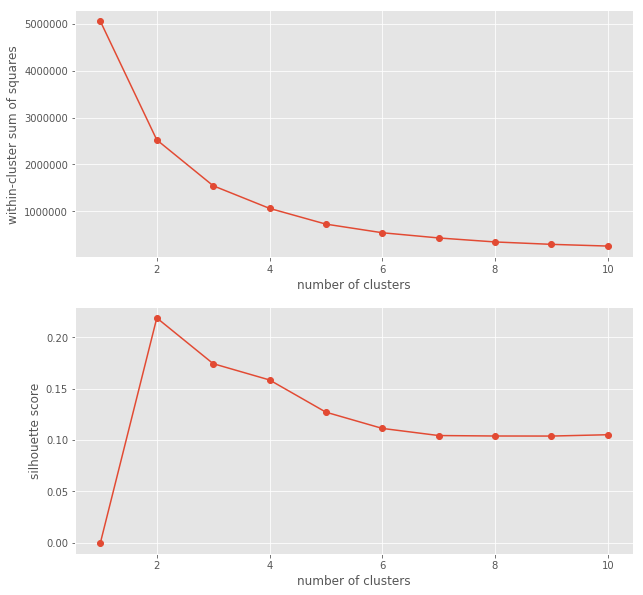

In [17]:
fig, axs = plt.subplots(2,1,figsize=(10,10))
wcss_and_silhouette(X_TMCQ_nonull, axs)

For n_clusters = 2 The average silhouette_score is : 0.21882625987
For n_clusters = 3 The average silhouette_score is : 0.173274654956
For n_clusters = 4 The average silhouette_score is : 0.158867445406
For n_clusters = 5 The average silhouette_score is : 0.127308810315


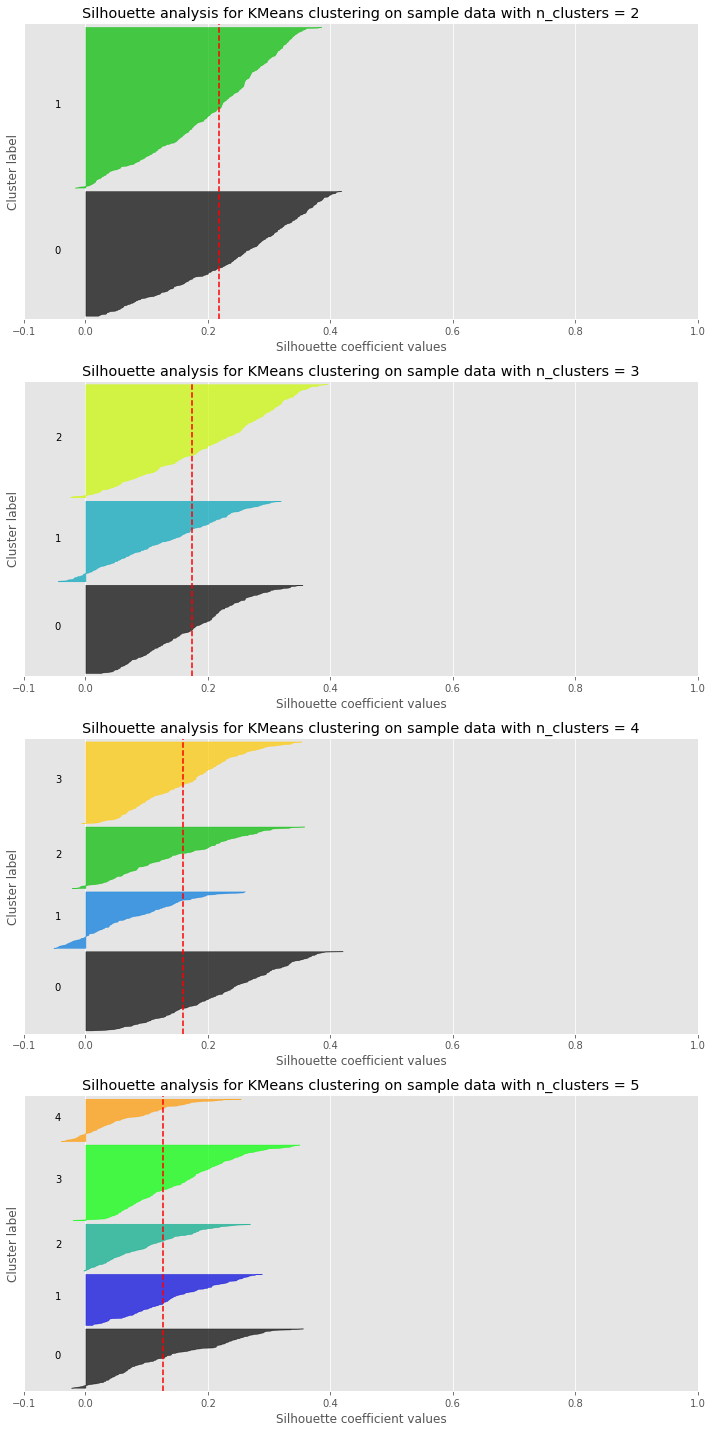

In [18]:
fig, axs = plt.subplots(4,1, figsize=(10,20))
silhouette_graph(X_TMCQ_nonull, axs)
plt.tight_layout()

## K = 2

It seems like K=2 is the best option for this data. I will thus explore the phenotypes of such.

In [19]:
km = KMeans(2)
y = km.fit_predict(X_TMCQ_nonull)

In [20]:
k2_df = X_TMCQ_nonull.copy()
k2_df['cluster'] = y

In [22]:
k2_df['DX'] = data.loc[X_TMCQ_nonull.index,'DX']
k2_df['DXSUB'] = data.loc[X_TMCQ_nonull.index,'DXSUB']

In [23]:
cluster0 = k2_df.loc[k2_df[k2_df['cluster']==0].index,:]
cluster1 = k2_df.loc[k2_df[k2_df['cluster']==1].index,:]

In [42]:
def make_jitter(data, jitter=0.3):
    return np.random.uniform(-jitter, jitter, size=data.shape)

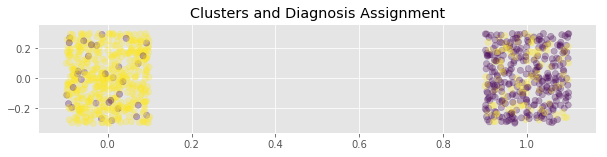

In [52]:
fig, ax = plt.subplots(figsize=(10,2))

_ = ax.scatter(k2_df.loc[:,'cluster']+make_jitter(k2_df.loc[:,'cluster'], 0.1), make_jitter(k2_df.loc[:,'DX']),
           c=k2_df.loc[:,'DX'],
           s=40, alpha=0.3)
#_ = ax.set_xlim(0,1)
_ = ax.set_title('Clusters and Diagnosis Assignment')

In [24]:
cluster0['DX'].value_counts()

3.0    467
1.0     33
Name: DX, dtype: int64

In [25]:
cluster1['DX'].value_counts()

1.0    291
3.0     97
Name: DX, dtype: int64

Here, it's easy to see that cluster 0 roughly corresponds to ADHD, cluster 1 corresponds to control.

DXSUB is still pretty well partitioned - Cluster 1 contains more ADHD subjects than cluster 0

In [132]:
from collections import defaultdict

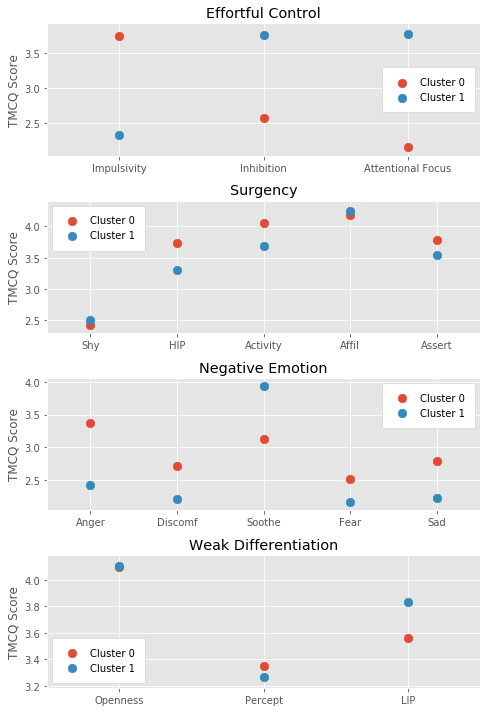

In [185]:
title_list = ['Effortful Control', 'Surgency', 'Negative Emotion', 'Weak Differentiation']
tmcq_cols = [effortful_control, surgency, negative_emotion, weak_differentiation]
tmcq_col_dict = {'Effortful Control': ['Impulsivity', 'Inhibition', 'Attentional Focus'],
                 'Surgency': ['Shy', 'HIP', 'Activity', 'Affil', 'Assert'],
                 'Negative Emotion': ['Anger', 'Discomf', 'Soothe', 'Fear', 'Sad'],
                 'Weak Differentiation': ['Openness', 'Percept', 'LIP']}
cluster_list = [cluster0, cluster1]
cluster_labels = ['Cluster 0', 'Cluster 1']

fig, axs = plt.subplots(4,1,figsize=(7,10))

run_TMCQ_graph(cluster_list, tmcq_cols, tmcq_col_dict, axs)
plt.tight_layout()

## Conclusions

KMeans does not appear to be giving great clusters on control+adhd dataset. n=2 clusters appears to be the best.

# K-Means on ADHD

Following the JAMA paper, I will now examine the ADHD sample and control sample separately for clusters.

In [192]:
data = pd.read_csv('data/Christie_diagnosis_20180118.csv')
data_ADHD = data[data['DX'] == 3]
#data_small = data.sample(n=200)
X_TMCQ_ADHD = data_ADHD[['Y1_P_TMCQ_ACTIVITY', 
            'Y1_P_TMCQ_AFFIL',  
            'Y1_P_TMCQ_ANGER',  
            'Y1_P_TMCQ_FEAR',  
            'Y1_P_TMCQ_HIP',  
            'Y1_P_TMCQ_IMPULS',  
            'Y1_P_TMCQ_INHIBIT',  
            'Y1_P_TMCQ_SAD', 
            'Y1_P_TMCQ_SHY', 
            'Y1_P_TMCQ_SOOTHE',  
            'Y1_P_TMCQ_ASSERT', 
            'Y1_P_TMCQ_ATTFOCUS',  
            'Y1_P_TMCQ_LIP', 
            'Y1_P_TMCQ_PERCEPT', 
            'Y1_P_TMCQ_DISCOMF', 
            'Y1_P_TMCQ_OPENNESS']]

X_TMCQ_nonull_ADHD = X_TMCQ_ADHD[X_TMCQ_ADHD.isnull().sum(axis=1) == 0]

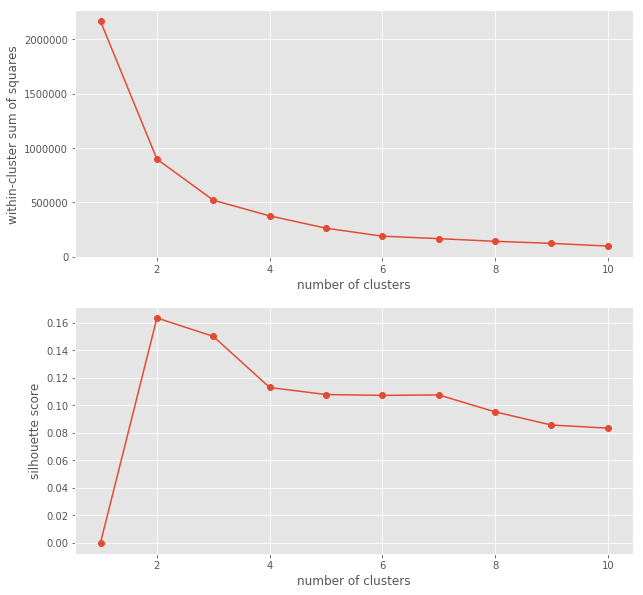

In [193]:
fig, axs = plt.subplots(2,1,figsize=(10,10))
wcss_and_silhouette(X_TMCQ_nonull_ADHD, axs)

For n_clusters = 2 The average silhouette_score is : 0.16333709308
For n_clusters = 3 The average silhouette_score is : 0.150414053095
For n_clusters = 4 The average silhouette_score is : 0.118334397483
For n_clusters = 5 The average silhouette_score is : 0.104117363873


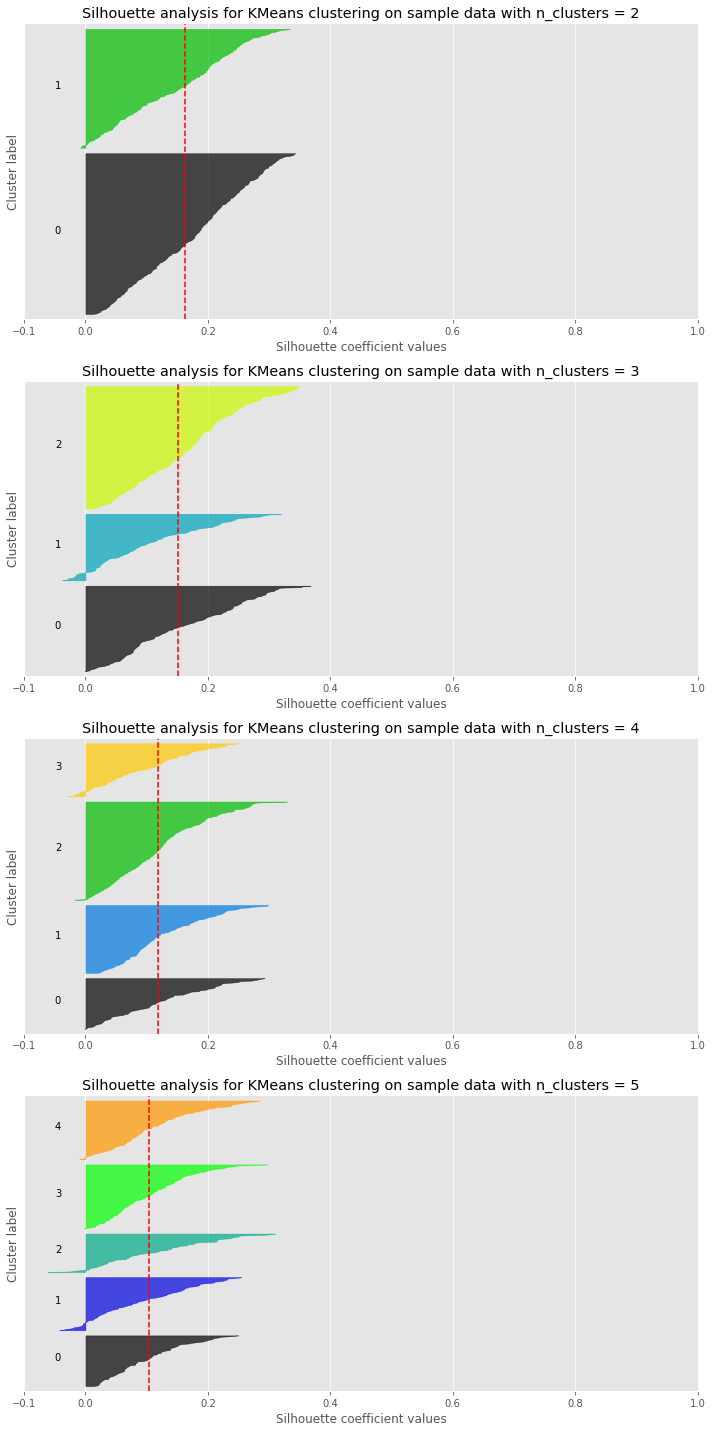

In [194]:
fig, axs = plt.subplots(4,1, figsize=(10,20))
silhouette_graph(X_TMCQ_nonull_ADHD, axs)
plt.tight_layout()

### K = 2

I will now investigate the TMCQ profiles using z-scores of the ADHD sample, following the procedure of the JAMA paper.

In [195]:
km_ADHD = KMeans(2)
y_ADHD = km.fit_predict(X_TMCQ_nonull_ADHD)

In [197]:
k2_df_ADHD = X_TMCQ_nonull_ADHD.copy()
k2_df_ADHD['cluster'] = y_ADHD

In [198]:
k2_df_ADHD['DX'] = data.loc[X_TMCQ_nonull_ADHD.index,'DX']
k2_df_ADHD['DXSUB'] = data.loc[X_TMCQ_nonull_ADHD.index,'DXSUB']

In [199]:
cluster0 = k2_df_ADHD.loc[k2_df_ADHD[k2_df_ADHD['cluster']==0].index,:]
cluster1 = k2_df_ADHD.loc[k2_df_ADHD[k2_df_ADHD['cluster']==1].index,:]

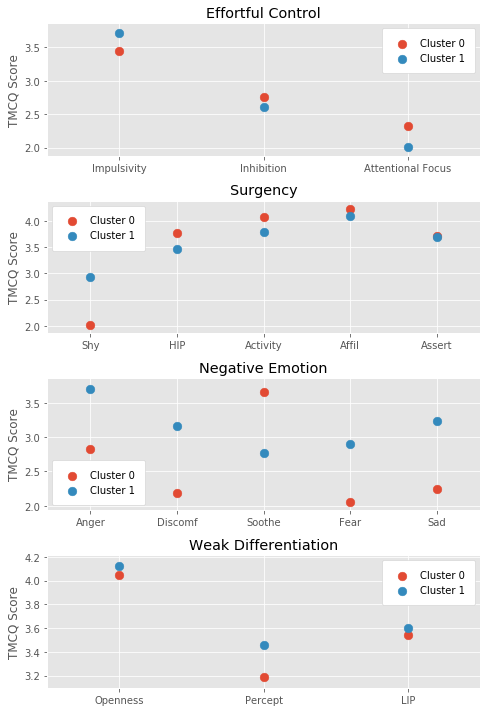

In [200]:
title_list = ['Effortful Control', 'Surgency', 'Negative Emotion', 'Weak Differentiation']
tmcq_cols = [effortful_control, surgency, negative_emotion, weak_differentiation]
tmcq_col_dict = {'Effortful Control': ['Impulsivity', 'Inhibition', 'Attentional Focus'],
                 'Surgency': ['Shy', 'HIP', 'Activity', 'Affil', 'Assert'],
                 'Negative Emotion': ['Anger', 'Discomf', 'Soothe', 'Fear', 'Sad'],
                 'Weak Differentiation': ['Openness', 'Percept', 'LIP']}
cluster_list = [cluster0, cluster1]
cluster_labels = ['Cluster 0', 'Cluster 1']

fig, axs = plt.subplots(4,1,figsize=(7,10))

run_TMCQ_graph(cluster_list, tmcq_cols, tmcq_col_dict, axs)
plt.tight_layout()

# K-Means on Control

In [33]:
data = pd.read_csv('data/Christie_diagnosis_20180118.csv')
data_control = data[data['DX'] == 1]
#data_small = data.sample(n=200)
X_TMCQ_control = data_control[['Y1_P_TMCQ_ACTIVITY', 
            'Y1_P_TMCQ_AFFIL',  
            'Y1_P_TMCQ_ANGER',  
            'Y1_P_TMCQ_FEAR',  
            'Y1_P_TMCQ_HIP',  
            'Y1_P_TMCQ_IMPULS',  
            'Y1_P_TMCQ_INHIBIT',  
            'Y1_P_TMCQ_SAD', 
            'Y1_P_TMCQ_SHY', 
            'Y1_P_TMCQ_SOOTHE',  
            'Y1_P_TMCQ_ASSERT', 
            'Y1_P_TMCQ_ATTFOCUS',  
            'Y1_P_TMCQ_LIP', 
            'Y1_P_TMCQ_PERCEPT', 
            'Y1_P_TMCQ_DISCOMF', 
            'Y1_P_TMCQ_OPENNESS']]

X_TMCQ_nonull_control = X_TMCQ_control[X_TMCQ_control.isnull().sum(axis=1) == 0]

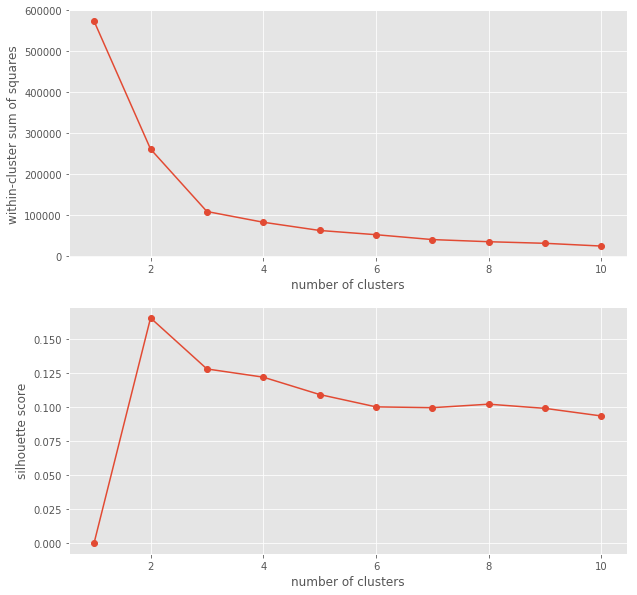

In [34]:
fig, axs = plt.subplots(2,1,figsize=(10,10))
wcss_and_silhouette(X_TMCQ_nonull_control, axs)

For n_clusters = 2 The average silhouette_score is : 0.166812070257
For n_clusters = 3 The average silhouette_score is : 0.127500950476
For n_clusters = 4 The average silhouette_score is : 0.120701638291
For n_clusters = 5 The average silhouette_score is : 0.108058620928


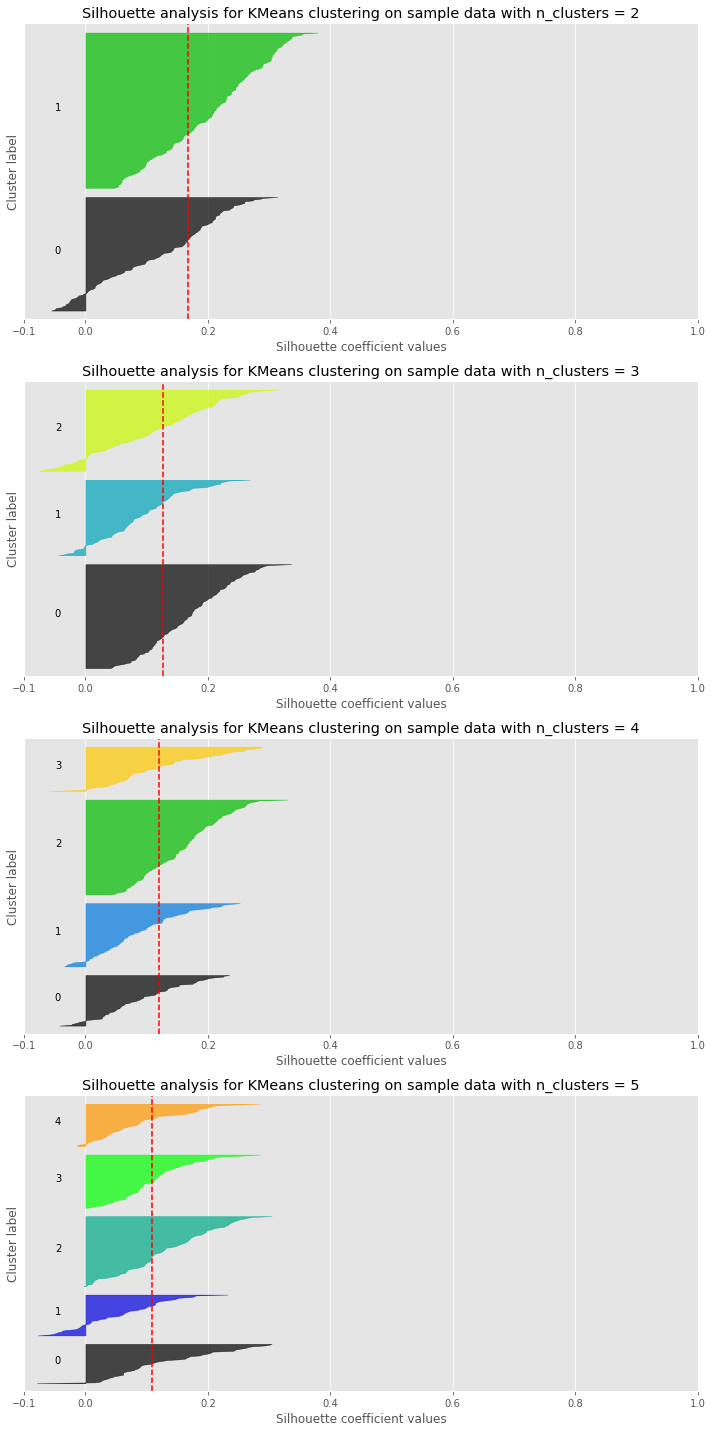

In [35]:
fig, axs = plt.subplots(4,1, figsize=(10,20))
silhouette_graph(X_TMCQ_nonull_control, axs)
plt.tight_layout()